In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd
from collections import defaultdict
import numpy as np

path_features = f"../ShapeDatabase_INFOMR_features"
class_types = os.listdir(path_features)
class_types = [class_type for class_type in class_types if os.path.isdir(path_features + "/" + class_type) and class_type != ".git"]

feature_vectors = defaultdict(list)
errors = 0
for class_type in class_types:
    path_class_features = os.path.join(path_features, class_type)
    for obj_feature in os.listdir(path_class_features):
        path = os.path.join(path_class_features, obj_feature)
        try:
            feature_vector = pickle.load(open(path, "rb"))
        except:
            errors+=1
            print(path)

        feature_vectors["obj_name"] += [feature_vector["obj_name"]]
        feature_vectors["class_type"] += [feature_vector["class_type"]]
        feature_vectors["feature_vector"] += [feature_vector["feature_vector"]]
        
        #### computation order
        # surface_area,
        # compactness,
        # rectangularity,
        # diameter,
        # convexity,
        # eccentricity,

        feature_vectors["surface_area"] += [feature_vector["feature_vector"][0]]
        feature_vectors["compactness"] += [feature_vector["feature_vector"][1]]
        feature_vectors["rectangularity"] += [feature_vector["feature_vector"][2]]
        feature_vectors["diameter"] += [feature_vector["feature_vector"][3]]
        feature_vectors["convexity"] += [feature_vector["feature_vector"][4]]
        feature_vectors["eccentricity"] += [feature_vector["feature_vector"][5]]
        for shape_prop, values in feature_vector["unbinned_shape_property"].items():
            feature_vectors[shape_prop] += [values]


In [2]:
df_features = pd.DataFrame(feature_vectors)
df_features.head()

,obj_name,class_type,feature_vector,surface_area,compactness,rectangularity,diameter,convexity,eccentricity,d1,d1_unbinned,d2,d2_unbinned,d3,d3_unbinned,d4,d4_unbinned,a3,a3_unbinned
0,D00415,House,"[6.353799850857137, 59.619253410803886, 0.4070...",6.353800,59.619253,0.407028,1.203936,0.585186,6.727870,"[0.22508022288838936, 0.23517667818236387, 0.2...","[0.4993383896111089, 0.5303927725903586, 0.523...","[0.0036162280957423064, 0.027530579501996146, ...","[0.31163996764681495, 0.36584100822374377, 0.0...","[0.00014194323199322265, 0.010497407505299119,...","[0.03879727801493798, 0.17880122041685673, 0.1...","[0.0, 0.00750652899775388, 0.01501305799550776...","[0.16207331910608125, 0.1324852579275821, 0.29...","[0.0, 0.06283172284267209, 0.12566344568534418...","[1.5379437648393377, 0.283993551784348, 1.1624..."
1,m456,House,"[1.3589595008482618, 5.931766799570658, 0.1208...",1.358960,5.931767,0.120894,1.051998,0.509102,5.636278,"[0.02426811422248353, 0.03544137408062422, 0.0...","[0.18033964529153823, 0.15903885857850875, 0.1...","[0.00021383016986383904, 0.018787150933000974,...","[0.0785174466283079, 0.28926904232555145, 0.31...","[0.0, 0.004480667499194191, 0.0089613349983883...","[0.02567657811169966, 0.058791674481685305, 0....","[0.0, 0.0043929778481456684, 0.008785955696291...","[0.05158667347230088, 0.04790686438026943, 0.0...","[0.0, 0.06313245707957792, 0.12626491415915583...","[0.6348070508536552, 0.5649317480838831, 0.499..."
2,D00091,House,"[4.085637578084651, 8.233417857177377, 0.57968...",4.085638,8.233418,0.579682,1.209444,0.966516,14.712959,"[0.11646455974832033, 0.1288867987703695, 0.14...","[0.3879924105682566, 0.6390067347677759, 0.578...","[0.0, 0.023346251300311982, 0.0466925026006239...","[0.31309441304603053, 1.0828607493133893, 0.95...","[0.0, 0.008878744313144626, 0.0177574886262892...","[0.04994326107499532, 0.003494861411639693, 0....","[0.0, 0.007453437269378331, 0.0149068745387566...","[0.11507628805621796, 0.10729531427166429, 0.0...","[0.003194811457690121, 0.06617557632631685, 0....","[0.35110326755052584, 0.7539584647676237, 0.45..."
3,m449,House,"[2.2733067372994205, 4.69246464728819, 0.36367...",2.273307,4.692465,0.363678,1.021986,0.817123,9.985234,"[0.19187171040655765, 0.19994533623485408, 0.2...","[0.3261537509428581, 0.3330025074712222, 0.312...","[0.0017651731171615971, 0.022282749313386967, ...","[0.5719653025528908, 0.5599377096437302, 0.879...","[0.0, 0.0066229426276486585, 0.013245885255297...","[0.03058518056073771, 0.2251672670061532, 0.12...","[0.0033563681275622795, 0.009169345460337947, ...","[0.1996017378763439, 0.17961865887322565, 0.20...","[0.0, 0.06395893154345882, 0.12791786308691763...","[0.8708009092771756, 0.5441206358065284, 0.516..."
4,m434,House,"[2.256682960589518, 2.4803807968161085, 0.3144...",2.256683,2.480381,0.314494,1.064437,0.907441,3.698293,"[0.025859414955500256, 0.038853279537403466, 0...","[0.5255201932620064, 0.06915725356134707, 0.16...","[0.0, 0.017317038154522027, 0.0346340763090440...","[0.5959618545277212, 0.44729062409684656, 0.52...","[5.750197202447359e-06, 0.006840369278811345, ...","[0.004815759022498842, 0.006814835759946841, 0...","[0.0, 0.005717269859207403, 0.0114345397184148...","[0.10344455536710355, 0.040717792048552554, 0....","[0.002725586943638897, 0.06606003542501612, 0....","[2.3070240585296315, 1.8078445913134573, 2.274..."


In [3]:
sns.set_theme(style="whitegrid")
def kde_shape_prop_plot(array_prop: np.ndarray, show_as_area = False, xlabel=""):
    for shape_val in array_prop:
        if show_as_area:
            sns.kdeplot(x=shape_val, legend=False, linewidth=0.8, fill=True, color=(0.15,0.15,0.15), alpha=0.45, edgecolor="white")
        else:
            sns.kdeplot(x=shape_val, legend=False, linewidth=0.8, color=(0.15,0.15,0.15))
    sns.despine()
    plt.xlabel(xlabel)
    plt.show()

In [4]:
sns.set_theme(style="whitegrid")
def kde_shape_prop_plot_combined(df: pd.DataFrame, show_as_area = False, xlabel="a3", class_to_represent="House", feature_to_represent="a3_unbinned", ax=None, show_plot=False):
    array_props = np.asarray(df[df["class_type"].isin([class_to_represent])][feature_to_represent].to_numpy()).T
    for shape_val in array_props:
        if show_as_area:
            plot = sns.kdeplot(x=shape_val, legend=False, linewidth=0.8, fill=True, color=(0.15,0.15,0.15), alpha=0.45, edgecolor="white", ax=ax)
        else:
            plot = sns.kdeplot(x=shape_val, legend=False, linewidth=0.8, color=(0.15,0.15,0.15), ax=ax)
    sns.despine()
    if ax:
        ax.set_xlabel(xlabel)
    else:
        plt.xlabel(xlabel)
    if show_plot:
        plt.show()
    return plot

def histogram_scalar_prop_plot(df: pd.DataFrame, xlabel="a3", class_to_represent="House", feature_to_represent="surface_area", ax=None, show_plot=False, bins=15):
    array_props = np.asarray(df[df["class_type"].isin([class_to_represent])][feature_to_represent].to_numpy())
    plot = sns.histplot(array_props, bins=bins)
    sns.despine()
    if ax:
        ax.set_xlabel(xlabel)
    else:
        plt.xlabel(xlabel)
    if show_plot:
        plt.show()
    return plot


In [26]:
import vedo
from MeshObject import *
def surface_area(mesh_obj):
    return mesh_obj.area()

def volume(mesh_obj):
    vols = []
    for connected in mesh_obj.cells:
        triangle = mesh_obj.coordinates[connected]
        volume = signed_volume_triangle(triangle)
        vols += [volume]
    
    volume = abs(sum(vols))
    return volume

def signed_volume_triangle(triangle):
    p1 = triangle[0]
    p2 = triangle[1]
    p3 = triangle[2]

    vol321 = p3[0] * p2[1] * p1[2]
    vol231 = p2[0] * p3[1] * p1[2]
    vol312 = p3[0] * p1[1] * p2[2]
    vol132 = p1[0] * p3[1] * p2[2]
    vol213 = p2[0] * p1[1] * p3[2]
    vol123 = p1[0] * p2[1] * p3[2]

    vol = (1/6) * (-vol321 + vol231 + vol312 - vol132 - vol213 + vol123)
    return vol

def compactness(mesh_obj: MeshObject):
    s = mesh_obj.area()
    v = mesh_obj.volume()
    c_orig = (surface_area(mesh_obj) ** 3) / (36 * np.pi * (volume(mesh_obj) ** 2))
    c_new = (s ** 3) / (36 * np.pi * (v ** 2))
    print(surface_area(mesh_obj) ** 3, (36 * np.pi * (volume(mesh_obj) ** 2)))
    return np.asarray([c_orig, c_new])

m = MeshObject("../ShapeDatabase_INFOMR/Cellphone/D00559.obj", visualize=True)
# m.volume()
# compactness(m)
m.show()
# D00559 - very messed up topology

In [ ]:
# problematic features = compactness, rectangularity, volume (stuff), convexity

In [25]:
df_features[df_features["convexity"] < 0.001]

,obj_name,class_type,feature_vector,surface_area,compactness,rectangularity,diameter,convexity,eccentricity,d1,d1_unbinned,d2,d2_unbinned,d3,d3_unbinned,d4,d4_unbinned,a3,a3_unbinned
649,m1280,Jet,"[0.2172508254328224, 12968.826783128765, 4.402...",0.217251,1.296883e+04,4.402386e-05,1.112673,2.392837e-04,37.786351,"[0.038991097278354626, 0.050625524991615295, 0...","[0.13253971959347588, 0.2876338872152977, 0.19...","[0.00277390272186699, 0.022845711323413717, 0....","[0.004605633196830275, 0.48168197399082413, 0....","[0.0, 0.004756074053128293, 0.0095121481062565...","[0.0014342904955735266, 0.01136257278394627, 0...","[0.0, 0.003398093873939983, 0.0067961877478799...","[0.0787906735504762, 0.040388241022791344, 0.0...","[0.0, 0.06324427389406977, 0.12648854778813953...","[0.1460300840636311, 0.6236924758447011, 0.421..."
1026,m910,RectangleTable,"[3.4046279354454927, 220379457705.96793, 2.053...",3.404628,2.203795e+11,2.053336e-07,1.003310,7.770060e-07,5.332196,"[0.05477255435619338, 0.06512595853028602, 0.0...","[0.22924501689303178, 0.10839655466689671, 0.2...","[0.0, 0.015234980037612367, 0.0304699600752247...","[0.20591576872786568, 0.11880111551250104, 0.2...","[0.0, 0.003709516013975632, 0.0074190320279512...","[0.00015819996564641955, 0.0001410004410976827...","[0.0, 0.005088667717454487, 0.0101773354349089...","[0.029478955042685037, 0.02456216263462195, 0....","[0.0006491255422359476, 0.06454433051347826, 0...","[1.256540830708376, 1.4783649437497854, 0.8812..."
1180,D00559,Cellphone,"[1.079376759221875, 1801836.3924770735, 6.0044...",1.079377,1.801836e+06,6.004468e-05,1.023362,1.331354e-04,57.613220,"[0.020565731863360914, 0.03253867003690026, 0....","[0.601444358688066, 0.2484919705842296, 0.1918...","[0.0, 0.020567620758277762, 0.0411352415165555...","[0.5342203039171416, 0.21239547328851463, 0.74...","[4.327622318052603e-07, 0.0035502862415885497,...","[0.000208444283503768, 0.0004266969456378608, ...","[0.0, 0.003474829248490061, 0.0069496584969801...","[0.06936931607402884, 0.0880402068528648, 0.05...","[0.0, 0.06384222215171582, 0.12768444430343165...","[0.8650151638620927, 1.665792793596858, 1.7992..."
1369,m1014,PlantIndoors,"[3.353515256559522, 57724.35230722728, 0.00034...",3.353515,5.772435e+04,3.436849e-04,1.044891,8.310588e-04,1.290024,"[0.02202680622960375, 0.03499307481758944, 0.0...","[0.19813187670407925, 0.22265254491635447, 0.2...","[0.011059926988371127, 0.028669721969049357, 0...","[0.5295264236523669, 0.17138449449969026, 0.39...","[0.0, 0.00616726877694505, 0.0123345375538901,...","[0.04426990900094512, 0.03003192899739084, 0.0...","[0.0, 0.004758207086135392, 0.0095164141722707...","[0.08971305186561945, 0.11500639435978745, 0.0...","[0.0003013243002516682, 0.06386747638089878, 0...","[0.8063719371205118, 1.853303714508125, 0.9376..."
1407,D00238,PlantIndoors,"[1.8585617608529892, 30036.69955493536, 3.0052...",1.858562,3.003670e+04,3.005260e-05,1.022710,8.194285e-05,2.282633,"[0.04902423657914419, 0.05938884388204472, 0.0...","[0.35563837030166107, 0.2932740218343192, 0.18...","[0.0, 0.019296939073760542, 0.0385938781475210...","[0.7317821414536233, 0.25537289199614666, 0.53...","[0.0, 0.007020869016714116, 0.0140417380334282...","[0.06656361377250324, 0.07479604268398994, 0.1...","[0.0, 0.006230883720690024, 0.0124617674413800...","[0.1691763052009826, 0.04719872619285021, 0.13...","[0.0, 0.06314568788124052, 0.12629137576248103...","[0.25038762977933515, 0.5174339479522095, 0.08..."
1951,m977,PlantWildNonTree,"[0.35624476316527354, 140465.85729710545, 0.00...",0.356245,1.404659e+05,1.465947e-04,1.003531,5.092452e-04,21.589386,"[0.012377600027949683, 0.023983818134450323, 0...","[0.3833643907314367, 0.40905139873280655, 0.45...","[0.0030522954973170612, 0.0231170336465527, 0....","[0.07692865282201039, 0.8493096248042294, 0.46...","[1.8596939765965894e-06, 0.005517733035736592,...","[0.03675546846591786, 0.19532620492326877, 0.0...","[0.0, 0.0052250470970338185, 0.010450094194067...","[0.0

In [6]:
df_features.iloc[df_features["compactness"].argmax()]

obj_name                                                       m910
class_type                                           RectangleTable
feature_vector    [3.4046279354454927, 220379457705.96793, 2.053...
surface_area                                               3.404628
compactness                                     220379457705.967926
rectangularity                                                  0.0
diameter                                                    1.00331
convexity                                                  0.000001
eccentricity                                               5.332196
d1                [0.05477255435619338, 0.06512595853028602, 0.0...
d1_unbinned       [0.22924501689303178, 0.10839655466689671, 0.2...
d2                [0.0, 0.015234980037612367, 0.0304699600752247...
d2_unbinned       [0.20591576872786568, 0.11880111551250104, 0.2...
d3                [0.0, 0.003709516013975632, 0.0074190320279512...
d3_unbinned       [0.00015819996564641955, 0.000

In [170]:
m.volume()

4.157386497443854

In [ ]:
sns.histplot(np.asarray(df_features[df_features["class_type"].isin(["RectangleTable"])]["compactness"].to_numpy()))

<Axes: xlabel='compactness', ylabel='Count'>

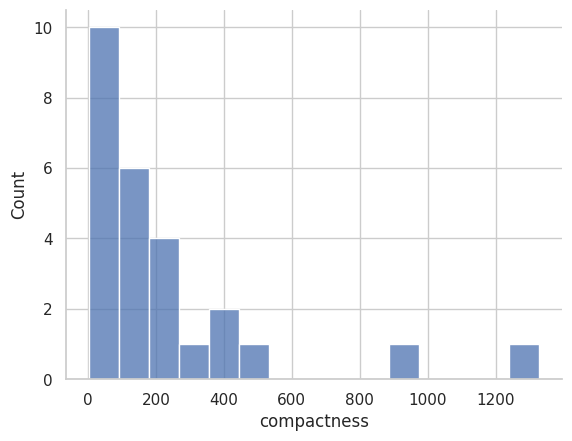

In [150]:
histogram_scalar_prop_plot(df_features, xlabel="compactness", class_to_represent="Mug", feature_to_represent="compactness", bins=15)

<Axes: xlabel='a3', ylabel='Density'>

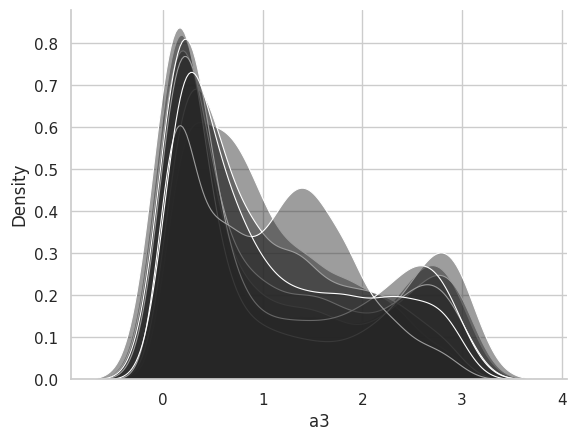

In [105]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Ship", feature_to_represent="a3_unbinned")

In [115]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Ship", feature_to_represent="surface_area")

ValueError: If using all scalar values, you must pass an index

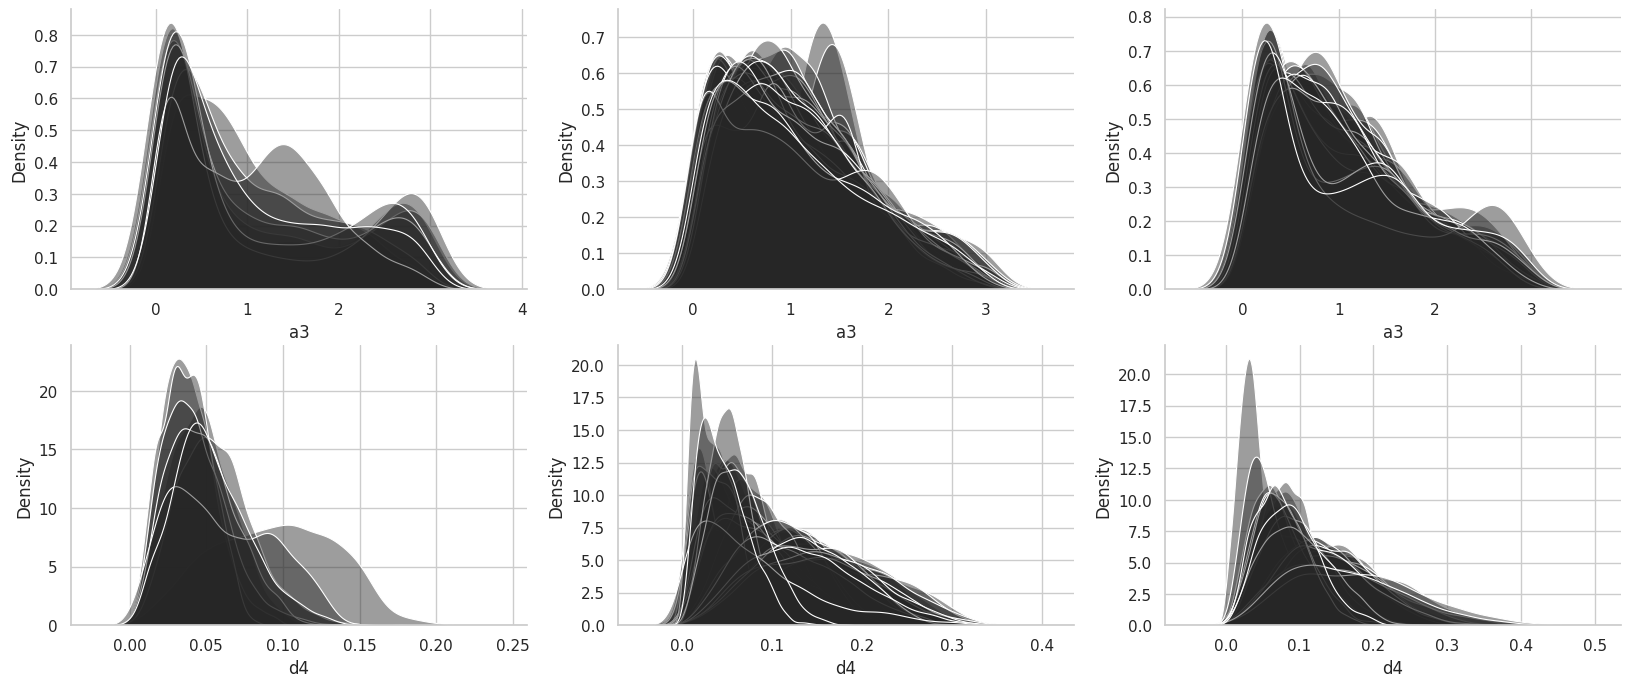

In [114]:
fig, axes = plt.subplots(2,3, sharey=False, figsize=(20,8))

# a3
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Ship", feature_to_represent="a3_unbinned", ax=axes[0,0])
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="House", feature_to_represent="a3_unbinned", ax=axes[0,1])
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Cup", feature_to_represent="a3_unbinned", ax=axes[0,2])
# d4
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="d4", class_to_represent="Ship", feature_to_represent="d4_unbinned", ax=axes[1,0])
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="d4", class_to_represent="House", feature_to_represent="d4_unbinned", ax=axes[1,1])
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="d4", class_to_represent="Cup", feature_to_represent="d4_unbinned", ax=axes[1,2])

plt.show()

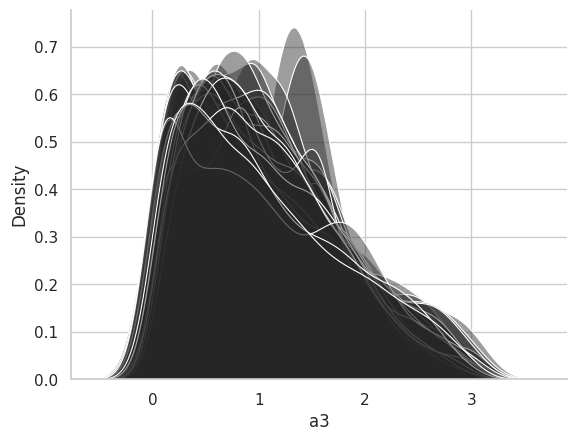

In [66]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="House", feature_to_represent="a3_unbinned")

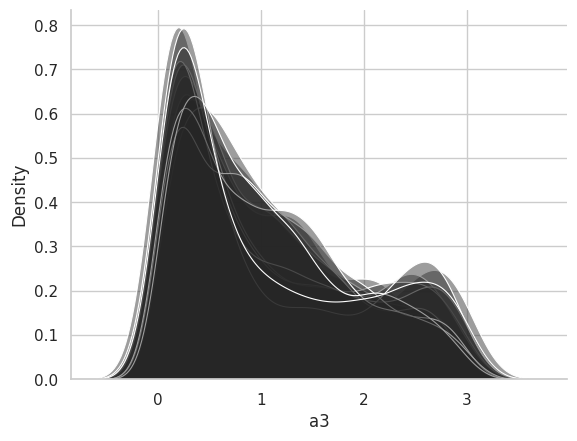

In [67]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Monoplane", feature_to_represent="a3_unbinned")

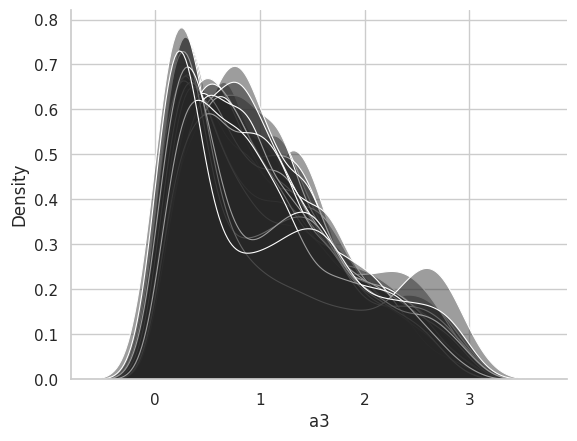

In [68]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Cup", feature_to_represent="a3_unbinned")

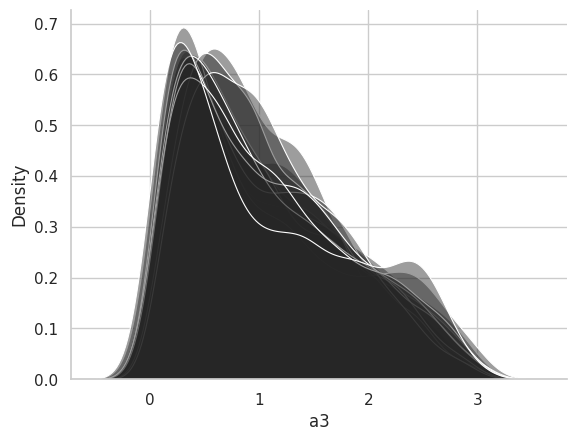

In [69]:
kde_shape_prop_plot_combined(df_features, show_as_area=True, xlabel="a3", class_to_represent="Quadruped", feature_to_represent="a3_unbinned")

In [53]:
# arr = np.asarray(df_features[df_features["class_type"] == "Quadruped"]["a3_unbinned"].tolist())
# kde_shape_prop_plot(array_prop=arr, show_as_area=True, xlabel="a3")